Library Import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# encoding , scaling
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, label_binarize

# split data
from sklearn.model_selection import train_test_split, GridSearchCV

# models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression

# evaluation
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, mean_squared_error,roc_curve, roc_auc_score


1- DATA EXPLORATION

In [3]:
# reading data
df = pd.read_csv(r"C:\Users\dohah\Documents\Projects\Detecting Malaria Model\MachineLearningProject\data_set\healthcare_dataset.csv")

In [4]:
# data exploration 
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [5]:
print(df['Test Results'].value_counts())
print(sum(df['Test Results'].value_counts()))
print("------------------------------------------------------------------------------")
print(df.dtypes)
print("------------------------------------------------------------------------------")
print(df.isnull().sum())

Test Results
Abnormal        18627
Normal          18517
Inconclusive    18356
Name: count, dtype: int64
55500
------------------------------------------------------------------------------
Name                   object
Age                     int64
Gender                 object
Blood Type             object
Medical Condition      object
Date of Admission      object
Doctor                 object
Hospital               object
Insurance Provider     object
Billing Amount        float64
Room Number             int64
Admission Type         object
Discharge Date         object
Medication             object
Test Results           object
dtype: object
------------------------------------------------------------------------------
Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Adm

2- DATA PREPROCESSING

In [6]:
# handeling missing data - there is no missing data
# .
# .

In [7]:
# target selecting
target = 'Test Results'
le = LabelEncoder()

In [8]:
# featur selecting
feature_cols = ['Gender', 'Blood Type', 'Medical Condition', 'Admission Type', 'Medication']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [9]:
# X & Y matrices

# encoding categorical features & defining num data
X_cat = encoder.fit_transform(df[feature_cols])
X_num = df[['Age', 'Billing Amount']] 

# merging cat with num data in one matrix 
X = np.hstack([X_num.values, X_cat]) # feature matrix     --- hstack : horizontal stack <nums at left , one hot at right>
# encoding target
y = le.fit_transform(df[target]) # target label     --- 0- Abnormal, 1-Inconclusive, 2- Normal

In [10]:
# X check
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,30.0,18856.281306,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,62.0,33643.327287,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,76.0,27955.096079,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,28.0,37909.782410,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,43.0,14238.317814,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [11]:
# y check
pd.DataFrame(y).head()

,0
0,2
1,1
2,2
3,0
4,0


In [12]:
# split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=0,
                                                    stratify=y,
                                                    shuffle=True
                                                    )


In [13]:
# scaling
scaler = StandardScaler()
X_train[:, :len(X_num)] = scaler.fit_transform(X_train[:, :len(X_num)])
X_test[:, :len(X_num)] = scaler.transform(X_test[:, :len(X_num)])

Missing values -not finished-

In [14]:
# KNN_imputer if needed

3- KNN MODEL

In [15]:
# finding best k
knn = KNeighborsClassifier()
# hyperparameter param_grid
param_grid = {'n_neighbors': np.arange(1,25)}
knn_gscv = GridSearchCV(knn, param_grid, cv=5 , scoring='accuracy') # cv: folds nomber in cross validation, 4 train 1 test 5 times, reduce overfitting
#print(knn_gscv.best_params_) -- hyperparameter best k

In [16]:
# KNN

# train the model
knn_gscv.fit(X_train, y_train)
# predict y
y_pred = knn_gscv.predict(X_test) 

4- EVALUATION

In [17]:
# need to be delete
print("KNN Results:")
cr = classification_report(y_test, y_pred, target_names=le.classes_)
print("classification_report : \n",cr)

KNN Results:
classification_report : 
               precision    recall  f1-score   support

    Abnormal       0.43      0.43      0.43      3726
Inconclusive       0.42      0.43      0.43      3671
      Normal       0.44      0.43      0.43      3703

    accuracy                           0.43     11100
   macro avg       0.43      0.43      0.43     11100
weighted avg       0.43      0.43      0.43     11100



In [18]:
# bad accuracy  -- need to be high
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.43018018018018017


Confusion Matrix

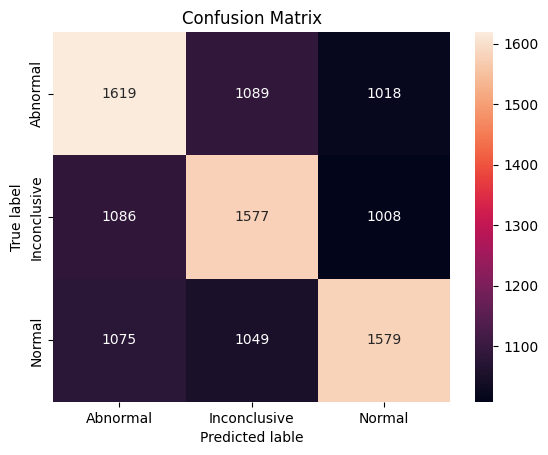

In [19]:
cm = confusion_matrix(y_test, y_pred)  

cm_df = pd.DataFrame(cm,
                     index= le.classes_,
                     columns= le.classes_)

sns.heatmap(cm_df, fmt='d', annot= True) # fmt='d' -> d means integer nombers will show
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted lable')
plt.show()



Loss Curve #Check

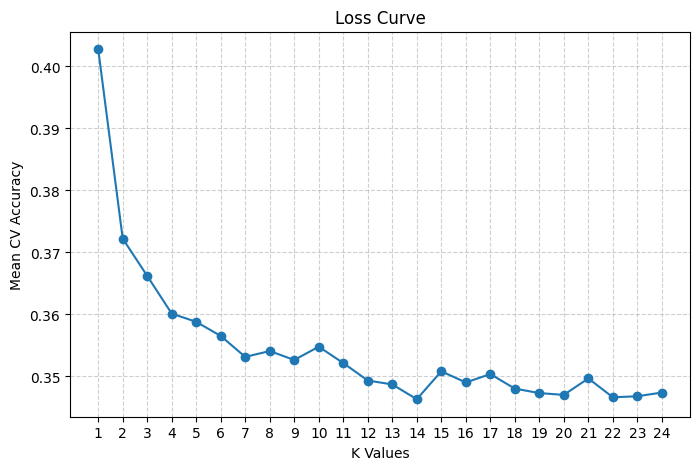

In [20]:
mean_scores = knn_gscv.cv_results_['mean_test_score']
k_values = param_grid['n_neighbors'] # from 1->24


plt.figure(figsize=(8, 5))
plt.plot(k_values, mean_scores, marker='o', linestyle='-')
plt.title('Loss Curve')
plt.xlabel('K Values')
plt.ylabel('Mean CV Accuracy')
plt.xticks(k_values)
plt.grid(True, linestyle='--', alpha=0.6)

# Highlight the best K value
# best_k = knn_gscv.best_params_['n_neighbors']
# best_score = knn_gscv.best_score_
# plt.scatter(best_k, best_score, color='red', s=100, label=f'Best K: {best_k:.0f}')

plt.show()

ROC

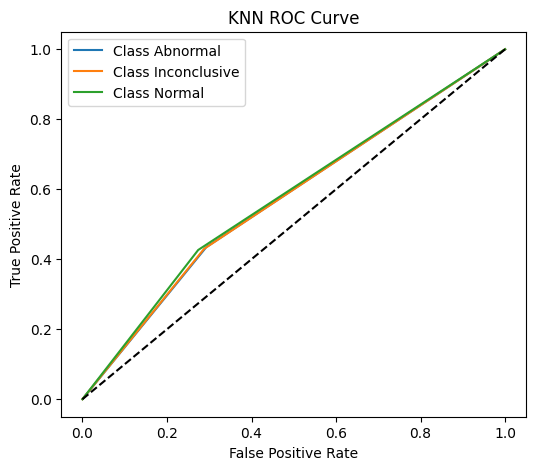

In [45]:
# Binarize labels for multi-class ROC
y_test_bin = label_binarize(y_test, classes= np.sort(pd.DataFrame(y)[0].unique()))
n_classes = y_test_bin.shape[1]

# KNN probabilities
y_score_knn = knn_gscv.predict_proba(X_test)

plt.figure(figsize=(6,5))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score_knn[:, i])
    plt.plot(fpr, tpr, label=f"Class {le.classes_[i]}")
plt.plot([0,1], [0,1], 'k--')  # خط الصدفة
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("KNN ROC Curve")
plt.legend()
plt.show()


.
.
.
.

.
.
.
.

ALL after need to check

Distribution of Test Results #need a look

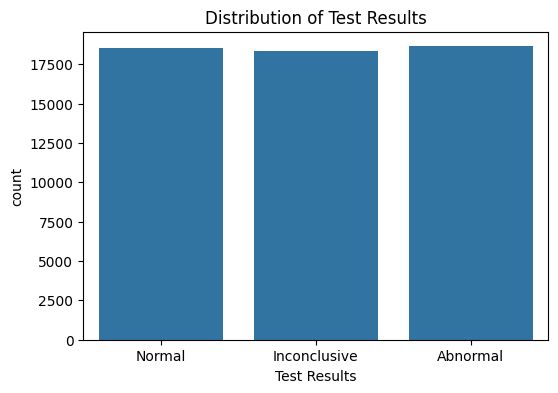

In [17]:
plt.figure(figsize=(6,4))
sns.countplot(x='Test Results', data=df)
plt.title("Distribution of Test Results")
plt.show()

In [ ]:
print("First 4 rows of X (numerical + one-hot features):")
print(X[:4])


Loos curve wrong way

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred_knn)  # MSE as an evaluation metric
print(mse)

In [ ]:
y_pred = model.predict(X)
plt.scatter(X[:,-3], y)
plt.plot(X[:,-3], y_pred, color='r')

Loos curve chatGPT way

In [60]:
lin_reg = LinearRegression()

# تدريب الموديل على بيانات التدريب
lin_reg.fit(X_train, y_train)

# التنبؤ على بيانات التدريب والاختبار
y_pred_train = lin_reg.predict(X_train)
y_pred_test = lin_reg.predict(X_test)
y_pred_test_class = np.round(y_pred_test).astype(int)  # تقريب للقيم الصحيحة للفئات

# حساب MSE لكل من train و test
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print("Linear Regression MSE (train):", mse_train)
print("Linear Regression MSE (test):", mse_test)


Linear Regression MSE (train): 0.669025846714669
Linear Regression MSE (test): 0.6694408599679678


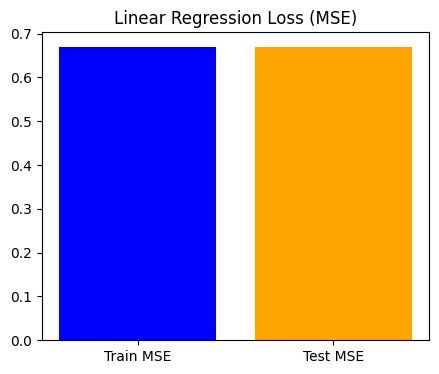

In [61]:
plt.figure(figsize=(5,4))
plt.bar(['Train MSE', 'Test MSE'], [mse_train, mse_test], color=['blue','orange'])
plt.title("Linear Regression Loss (MSE)")
plt.show()


Accuracy #high error

In [62]:
# Linear Regression (بعد تقريب القيم)
acc_lr = accuracy_score(y_test, np.round(lin_reg.predict(X_test)).astype(int))
print("Linear Regression Accuracy:", acc_lr)

# KNN
# knn = KNeighborsClassifier()
acc_knn = accuracy_score(y_test, knn_gscv.predict(X_test))
print("KNN Accuracy:", acc_knn)


Linear Regression Accuracy: 0.33072072072072073
KNN Accuracy: 0.43018018018018017
